Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [13]:
!pip install mlutils

In [14]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils as mu
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\lmark\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly', 'cross']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [15]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

In [16]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [17]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
seven_y_reverse = np.array([0, 0, 0, 0, 1, 1, 1])

seven_y_bi = np.array([1, 1, 1, 1, -1, -1, -1])

Parameters: (By ridge function) [ 2.1 -0.5 -0.1]
Actual regression params [0, 1]:  [ 1.55 -0.25 -0.05]
Reverese regression params [1, 0]:  [-0.55  0.25  0.05]
Actual - reverse =  [ 2.1 -0.5 -0.1]
Predicted values - comparison: 
0.0 ,  1.0 ,  1.0
0.1 ,  0.9 ,  0.8
-0.2 ,  1.2 ,  1.4
0.3 ,  0.7 ,  0.4
0.8 ,  0.2 ,  -0.6
0.9 ,  0.1 ,  -0.8
1.1 ,  -0.1 ,  -1.2
Predicted values:  [1, 1, 1, 1, 0, 0, 0]
Actual values:  [1 1 1 1 0 0 0]
Accuracy score:  1.0


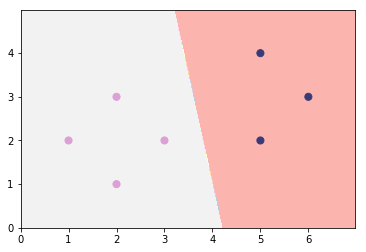

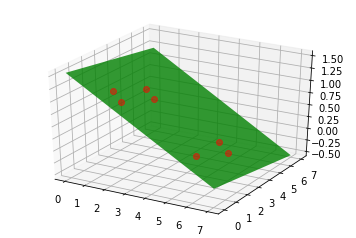

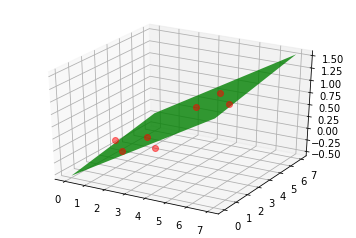

In [18]:
from sklearn.metrics import accuracy_score

# Get ridge classifier paramteres
ridge_classifier = RidgeClassifier(alpha=0)
ridge_classifier.fit(seven_X, seven_y)
w = np.concatenate((ridge_classifier.intercept_, ridge_classifier.coef_[0]))
print("Parameters: (By ridge function)", w)

def h_seven(x, w):
    return np.dot(w[1:], x) + w[0];


def calc_w(theta, y):
    innerBracket = numpy.matmul(theta.transpose(), theta)
    inverse = linalg.inv(innerBracket)
    w = linalg.multi_dot([inverse, theta.transpose(), y])
    return w

# Parameters by hand
from sklearn import preprocessing
poly = preprocessing.PolynomialFeatures(1)
theta = poly.fit_transform(seven_X)
new_w = calc_w(theta, seven_y)
reverse_w = calc_w(theta, seven_y_reverse)

print("Actual regression params [0, 1]: ", new_w)
print("Reverese regression params [1, 0]: ", reverse_w)
print("Actual - reverse = ", new_w - reverse_w)
print("Predicted values - comparison: ")
for x in seven_X:
    print(h_seven(x,reverse_w), ", ", h_seven(x, new_w),", ", h_seven(x, w))

# Plot the data
plt.figure()
plot_2d_clf_problem(seven_X, seven_y, lambda x: h_seven(x,new_w) >= 0.5)

# Measure error
y_hat_seven = [1 if (h_seven(x,w) >= 0) else 0 for x in seven_X]
print("Predicted values: ", y_hat_seven)
print("Actual values: ", seven_y)
error = accuracy_score(seven_y, y_hat_seven)
print("Accuracy score: ", error)


from mpl_toolkits.mplot3d import Axes3D
def cross(a, b):
    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

def z_magic(w, x, y):
    
    a = w[1]
    b = w[2]
    c = w[0]

    # Caluclate normal & point
    point  = np.array([0.0, 0.0, c])
    normal = np.array(cross([1,0,a], [0,1,b]))
    d = -point.dot(normal)

    xx, yy = np.meshgrid([0,7], [0,7])
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([x_[0] for x_ in x], [x_[1] for x_ in x], y, "ro", alpha=0.5, label = "training set")
    ax.plot_surface(xx, yy, z, alpha=0.8, color=[0,1,0], label = "regression plane")
    

z_magic(new_w, seven_X, seven_y)
z_magic(reverse_w, seven_X, seven_y_reverse)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Parameters:  [ 2.1 -0.5 -0.1]
1.0
0.9
1.2
0.7
0.2
0.1
-0.1
Predicted values:  [1, 1, 1, 1, 0, 0, 0]
Actual values:  [1 1 1 1 0 0 0]
Accuracy score:  1.0


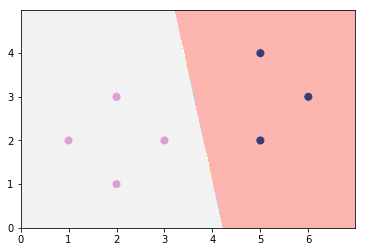

In [19]:
linear_regression = LinearRegression()
linear_regression.fit(seven_X, seven_y)
w = np.concatenate((ridge_classifier.intercept_, ridge_classifier.coef_[0]))
print("Parameters: ", w)
    
# Plot the data
plot_2d_clf_problem(seven_X, seven_y, lambda x: linear_regression.predict(x) >= 0.5)

for x in seven_X:
    print(h_seven(x, new_w))

# Measure error
y_hat_seven = [1 if x >= 0.5 else 0 for x in linear_regression.predict(seven_X)]
print("Predicted values: ", y_hat_seven)
print("Actual values: ", seven_y)
error = accuracy_score(seven_y, y_hat_seven)
print("Accuracy score: ", error)

Parameters - bipolar:  [ 2.1 -0.5 -0.1]


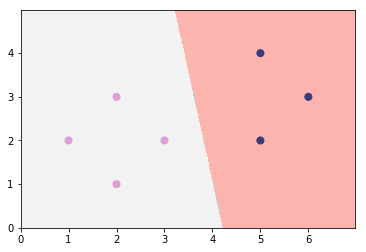

In [20]:
# y = {-1, 1}
linear_regression.fit(seven_X, seven_y_bi)
w = np.concatenate((ridge_classifier.intercept_, ridge_classifier.coef_[0]))
print("Parameters - bipolar: ", w)

# Plot the data
plot_2d_clf_problem(seven_X, seven_y_bi, lambda x: linear_regression.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [21]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Parameters:  [ 0.84938704 -0.4028021   0.30823117]
Predicted values:  [1, 1, 1, 1, 0, 1, 0, 0]
Actual values:  [1 1 1 1 0 0 0 0]
Accuracy score:  0.875


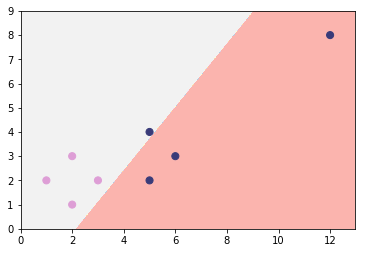

In [22]:
from sklearn.metrics import accuracy_score

# Get ridge classifier paramteres
ridge_classifier = RidgeClassifier(alpha=0)
ridge_classifier.fit(outlier_X, outlier_y)
w = np.concatenate((ridge_classifier.intercept_, ridge_classifier.coef_[0]))
print("Parameters: ", w)

def h_seven(x, w):
    return np.dot(w[1:], x) + w[0];

# Plot the data
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: h_seven(x,w) >= 0)

# Measure error
y_hat_seven = [1 if h_seven(x,w)>=0 else 0  for x in outlier_X]
print("Predicted values: ", y_hat_seven)
print("Actual values: ", outlier_y)
error = accuracy_score(outlier_y, y_hat_seven)
print("Accuracy score: ", error)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Parameters:  [ 1.50505051 -0.4040404  -0.08080808]
Predicted values:  [1, 1, 1, 1, 0, 0, 0, 1]
Actual values:  [1 1 1 1 0 0 0 0]
Accuracy score:  0.875


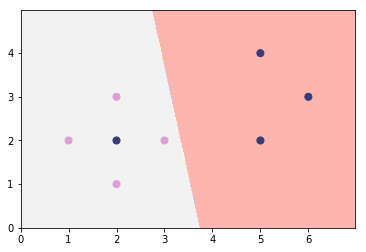

In [24]:
# Get ridge classifier paramteres
ridge_classifier = RidgeClassifier(alpha=0)
ridge_classifier.fit(unsep_X, unsep_y)
w = np.concatenate((ridge_classifier.intercept_, ridge_classifier.coef_[0]))
print("Parameters: ", w)

def h_seven(x, w):
    return np.dot(w[1:], x) + w[0];

# Plot the data
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: h_seven(x,w) >= 0)

# Measure error
y_hat_seven = [1 if (h_seven(x,w) >= 0) else 0 for x in unsep_X]
print("Predicted values: ", y_hat_seven)
print("Actual values: ", unsep_y)
error = accuracy_score(unsep_y, y_hat_seven)
print("Accuracy score: ", error)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

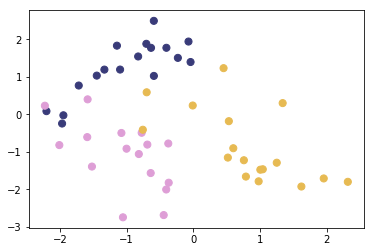

In [25]:
from sklearn.datasets import make_classification

multi_X, multi_y = make_classification(n_samples=50, n_features=2, n_informative=2, 
                                       n_redundant=0, n_clusters_per_class=1, n_classes=3)
plot_2d_clf_problem(multi_X, multi_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Predicted values - RidgeClassifier:  [0 0 0 2 0 0 2 1 2 1 1 0 2 2 0 0 2 0 2 0 1 0 0 1 2 1 2 2 1 1 1 0 0 0 1 1 2
 2 2 1 1 2 2 1 0 2 2 2 0 2]
Actual values - RidgeClassifier:  [0 0 0 2 1 0 2 1 0 1 1 0 2 2 2 0 2 1 2 0 1 0 0 1 2 1 2 2 1 1 1 0 0 0 1 1 0
 0 1 1 1 2 2 1 0 2 2 2 0 2]
Accuracy score - RidgeClassifier:  0.86


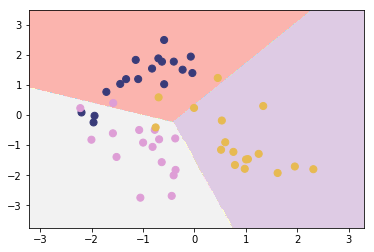

In [26]:
# Learn using Ridge classifier model 
ridge_model = RidgeClassifier(alpha=0)
ridge_model.fit(multi_X, multi_y)
w_ridge = [ridge_model.intercept_, ridge_model.coef_[0]]

# Plot the data
plot_2d_clf_problem(multi_X, multi_y, lambda x: ridge_model.predict(x))

# Measure error
y_hat_multi_ridge = ridge_model.predict(multi_X)
print("Predicted values - RidgeClassifier: ", y_hat_multi_ridge)
print("Actual values - RidgeClassifier: ", multi_y)
error = accuracy_score(y_hat_multi_ridge, multi_y)
print("Accuracy score - RidgeClassifier: ", error)

Predicted values - 'ručno':  [0, 0, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2]
Actual values - 'ručno':  [0 0 0 2 1 0 2 1 0 1 1 0 2 2 2 0 2 1 2 0 1 0 0 1 2 1 2 2 1 1 1 0 0 0 1 1 0
 0 1 1 1 2 2 1 0 2 2 2 0 2]
Accuracy score - 'ručno':  0.86


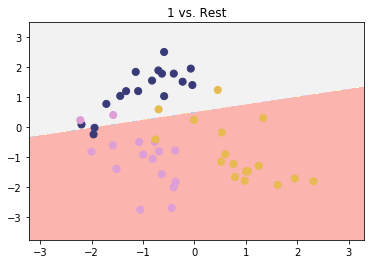

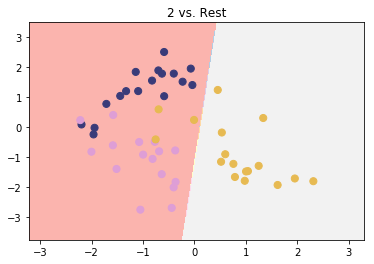

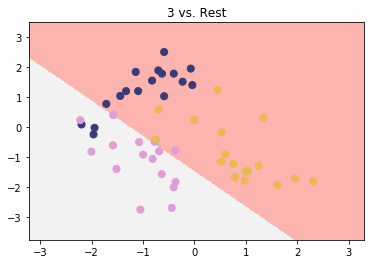

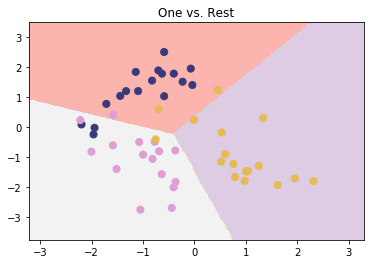

In [27]:
#OVR - split 1 class vs rest 
multi_y_0vR = [1 if y == 0 else 0 for y in multi_y] 
multi_y_1vR = [1 if y == 1 else 0 for y in multi_y] 
multi_y_2vR = [1 if y == 2 else 0 for y in multi_y] 

linear_model = LinearRegression()

def h_multi(x, w):
    return np.dot(w[1:], x) + w[0];

# 0 vs Rest
linear_model.fit(multi_X, multi_y_0vR)
w0 = [linear_model.intercept_, linear_model.coef_]
h0 = lambda x : h_multi(x, w0)
plt.figure()
plt.title("1 vs. Rest")
plot_2d_clf_problem(multi_X, multi_y, lambda x: h0(x) >= 0.5)

# 1 vs Rest
linear_model.fit(multi_X, multi_y_1vR)
w1 = [linear_model.intercept_, linear_model.coef_]
h1 = lambda x : h_multi(x, w1)
plt.figure()
plt.title("2 vs. Rest")
plot_2d_clf_problem(multi_X, multi_y, lambda x: h1(x) >= 0.5)

# 2 vs Rest
linear_model.fit(multi_X, multi_y_2vR)
w2 = [linear_model.intercept_, linear_model.coef_]
h2 = lambda x : h_multi(x, w2)
plt.figure()
plt.title("3 vs. Rest")
plot_2d_clf_problem(multi_X, multi_y, lambda x: h2(x) >= 0.5)

# Find best match: argmax_j { h_j(x) }
def ovr(x):
    return np.argmax([h0(x), h1(x), h2(x)])

# Plot the data
plt.figure()
plt.title("One vs. Rest")
plot_2d_clf_problem(multi_X, multi_y, lambda x: ovr(x))

# Measure error
y_hat_multi_rucno = [ovr(x) for x in multi_X]
print("Predicted values - 'ručno': ", y_hat_multi_rucno)
print("Actual values - 'ručno': ", multi_y)
error = accuracy_score(y_hat_multi_rucno, multi_y)
print("Accuracy score - 'ručno': ", error)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

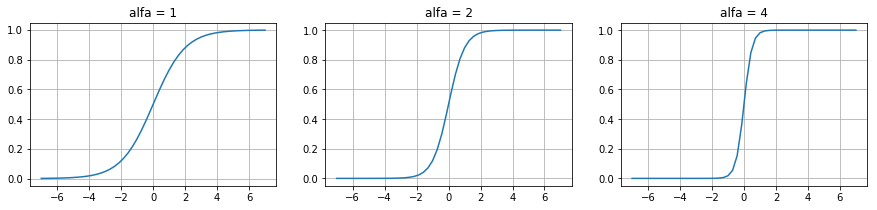

In [28]:
def sigm(x, alfa):
    return 1/(1+exp(-alfa*x));

alfa_list = [1, 2, 4]
figure, axes = plt.subplots(1, 3, figsize=(15,3))

x = linspace(-7, 7)
for i, alfa in enumerate(alfa_list):
    axes[i].plot(x, sigm(x, alfa))
    axes[i].grid()
    axes[i].set_title("alfa = {0}".format(alfa))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [29]:
from sklearn import preprocessing 

def lr_h(x,w):
    """
    h(x;w) = f_sigm(w dot x + w0)
    """
    if (len(x)==2):
        return sigm(np.dot(x, w[1:]) + w[0], 1)
    else:
        return sigm(np.dot(x, w), 1)

def cross_entropy_error(X, y, w):
    error = 0
    N = np.shape(X)[0]
    
    for x_i, y_i in zip(X,y):
        h_prediction = lr_h(x_i, w)
        error = error - y_i * log( h_prediction) - (1 - y_i) * log( 1 - h_prediction)
    
    # Normalize the error: 1/N
    return error/N

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    """
    eta -- Scalar, multiplies with gradient.
    max_iter -- Maximum number of iterations
    alpha -- Regularization factor
    epsilon -- Convergence error toll
    
    Returns (n+1) dim weight vector, type 'ndarray'. 
        If trace is True also returns a matrix with 
        columns as weights across all iterations as a tuple.
    """
    poly = preprocessing.PolynomialFeatures(1)
    FI = poly.fit_transform(X)

    all_weights = []
    n = np.shape(X)[1] + 1 # 1 more for dummy
    current_w = np.zeros(n)
    current_error = -1
    
    for k in range(max_iter):
        
        # Check for stalling
        new_error = cross_entropy_error(FI, y, current_w)
        if (abs(current_error - new_error) <= epsilon):
            print("Solution found - iteration: {0}".format(k))
            break; # Solution found
        current_error = new_error
        
        #print("Iter: {0}, error: {1}".format(k, current_error))
        # Calculate gradient across all examples
        grad_w = np.zeros(n)
        grad_w0 = 0
        for fi_i, y_i in zip(FI,y):
            y_hat = lr_h(fi_i, current_w)
            grad_w = grad_w + (y_hat - y_i)*fi_i
            grad_w0 = grad_w0 + (y_hat - y_i)
            
        # Calculate new weights
        new_w = np.zeros(n)
        new_w[0] = current_w[0] - eta * grad_w0
        new_w[1:] = current_w[1:]*(1-eta*alpha) - eta * grad_w[1:]
        
        # Update trace if needed
        if (trace):
            all_weights.append(new_w)
            
        # Upadte current weights
        current_w = new_w
        
    # Return trace along with solution
    if (trace):
        return (current_w, all_weights)
    else:
        return current_w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Solution found - iteration: 947
[ 4.45449454 -1.71089242  0.68413507]
Error:  0.135218727202


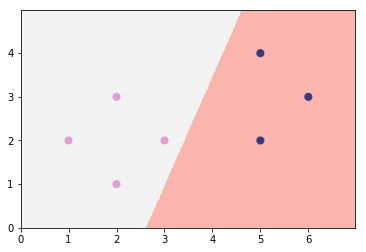

In [30]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

lr_w, w_trace = lr_train(seven_X, seven_y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=True)

# Plot the data
print(lr_w)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, lr_w) >= 0.5)
print("Error: ", cross_entropy_error(seven_X, seven_y, lr_w))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

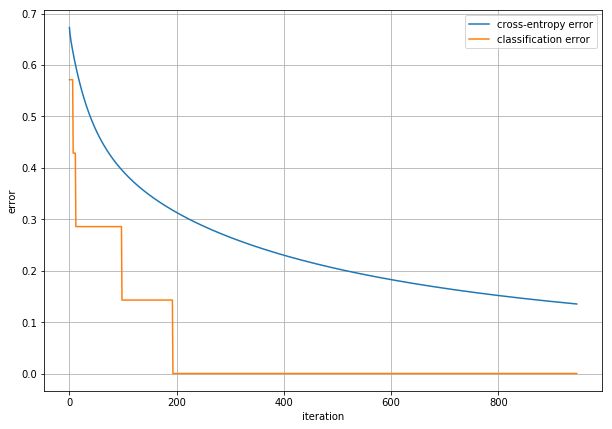

In [31]:
xe_error = []
class_error = []

for w_i in w_trace:
    xe_error.append(cross_entropy_error(seven_X, seven_y, w_i))
    
    current_class_error = 0
    for x_i, y_i in zip(seven_X, seven_y):
        percent = lr_h(x_i, w_i)
        y_hat = 1 if percent >= 0.5 else 0
        current_class_error = current_class_error + abs(y_hat - y_i)
    
    class_error.append(current_class_error/len(seven_y))
    
plt.figure(figsize=(10,7))
plt.plot(range(len(w_trace)), xe_error, label="cross-entropy error")
plt.plot(range(len(w_trace)), class_error, label="classification error")
plt.legend(loc="best")
plt.xlabel("iteration")
plt.ylabel("error")
plt.grid()


Solution found - iteration: 1142
Solution found - iteration: 947
Solution found - iteration: 511
Solution found - iteration: 378


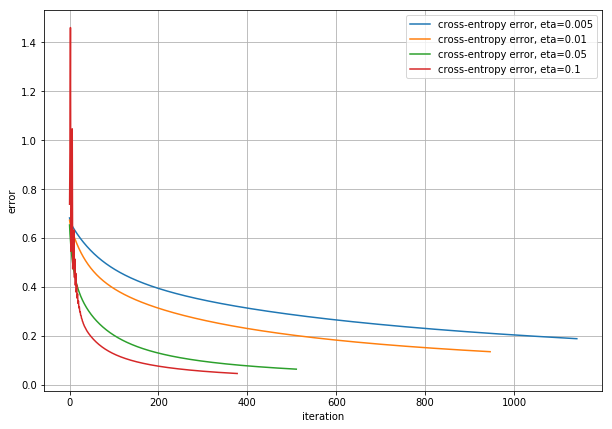

In [32]:
eta_list = [0.005,0.01,0.05,0.1]

plt.figure(figsize=(10,7))
for eta_ in eta_list:
    lr_w, w_trace = lr_train(seven_X, seven_y, eta=eta_, max_iter=2000, alpha=0, epsilon=0.0001, trace=True)
    
    xe_error = []
    for w_i in w_trace:
        xe_error.append(cross_entropy_error(seven_X, seven_y, w_i))
    
    plt.plot(range(len(w_trace)), xe_error, label="cross-entropy error, eta={}".format(eta_))

plt.legend(loc="best")
plt.grid()
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Error:  4.6135579929e-06


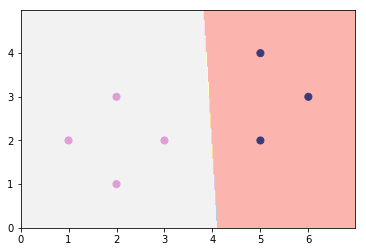

In [33]:
from sklearn.linear_model import LogisticRegression

# C - inverse regularization factor 
log_reg = LogisticRegression(tol=0.00001, max_iter=1000, C=1e10)
log_reg.fit(seven_X, seven_y)
log_reg_w = np.concatenate((log_reg.intercept_, log_reg.coef_[0]))

# Plot the data
plot_2d_clf_problem(seven_X, seven_y, lambda x: log_reg.predict(x))
print("Error: ", cross_entropy_error(seven_X, seven_y, log_reg_w))

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

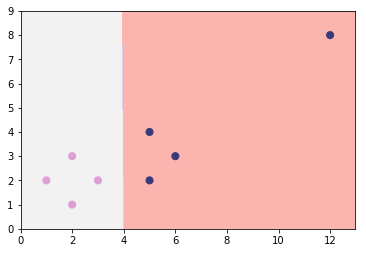

In [34]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

log_reg = LogisticRegression(tol=0.00001, max_iter=1000, C=1e10)
log_reg.fit(outlier_X, outlier_y)
log_reg_outlier_w = np.concatenate((log_reg.intercept_, log_reg.coef_[0]))

# Plot the data
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: log_reg.predict(x))

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


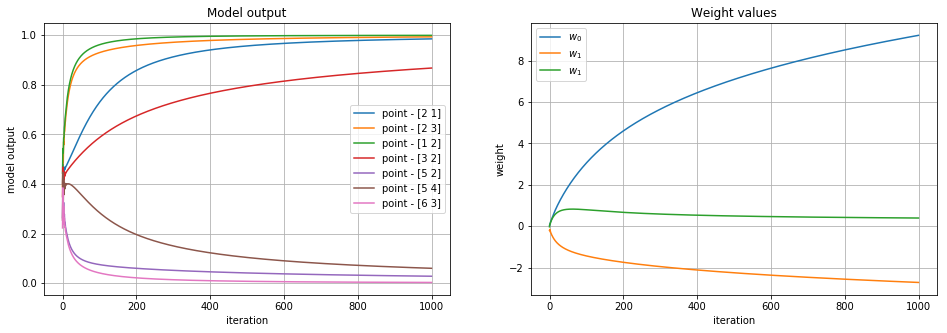

In [35]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

lr_w, w_trace = lr_train(seven_X, seven_y, eta=0.05, max_iter=1000, alpha=0, epsilon=0.00001, trace=True)

y_all_predictions = [ [] for i in range(len(seven_y))]
for w_ in w_trace:
    
    # Add all predictions for w_
    for i, x_ in enumerate(seven_X):
        y_predict = lr_h(x_,w_)
        y_all_predictions[i].append(y_predict)
    
figure, ax = plt.subplots(1,2, figsize=(16,5))
for i, y_hat in enumerate(y_all_predictions):
    ax[0].plot(range(len(y_hat)), y_hat, label="point - {0}".format(seven_X[i]))
    

# extract weights
w_0 = [w_[0] for w_ in w_trace]
w_1 = [w_[1] for w_ in w_trace]
w_2 = [w_[2] for w_ in w_trace]
ax[1].plot(range(len(y_hat)), w_0, label="$w_0$")
ax[1].plot(range(len(y_hat)), w_1, label="$w_1$")
ax[1].plot(range(len(y_hat)), w_2, label="$w_1$")

ax[0].legend(loc="best")
ax[0].grid()
ax[0].set_ylabel("model output")
ax[0].set_xlabel("iteration")
ax[0].set_title("Model output")

ax[1].legend(loc="best")
ax[1].grid()
ax[1].set_ylabel("weight")
ax[1].set_xlabel("iteration")
ax[1].set_title("Weight values")

plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Solution found - iteration: 470


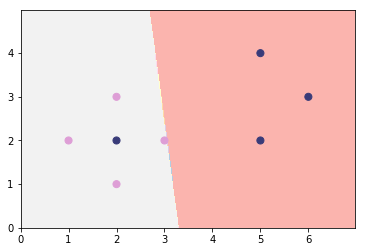

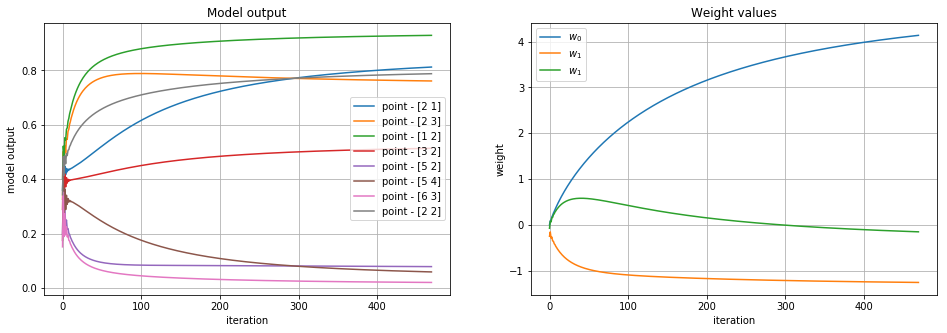

In [36]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

lr_w, w_trace = lr_train(unsep_X, unsep_y, eta=0.05, max_iter=1000, alpha=0, epsilon=0.00001, trace=True)

plt.figure()
plot_2d_clf_problem(unsep_X, unsep_y, lambda x : lr_h(x, lr_w) >= 0.5)
y_all_predictions = [ [] for i in range(len(unsep_y))]
for w_ in w_trace:
    
    # Add all predictions for w_
    for i, x_ in enumerate(unsep_X):
        y_predict = lr_h(x_,w_)
        y_all_predictions[i].append(y_predict)
    
figure, ax = plt.subplots(1,2, figsize=(16,5))
for i, y_hat in enumerate(y_all_predictions):
    ax[0].plot(range(len(y_hat)), y_hat, label="point - {0}".format(unsep_X[i]))
    

# extract weights
w_0 = [w_[0] for w_ in w_trace]
w_1 = [w_[1] for w_ in w_trace]
w_2 = [w_[2] for w_ in w_trace]
ax[1].plot(range(len(y_hat)), w_0, label="$w_0$")
ax[1].plot(range(len(y_hat)), w_1, label="$w_1$")
ax[1].plot(range(len(y_hat)), w_2, label="$w_1$")

ax[0].legend(loc="best")
ax[0].grid()
ax[0].set_ylabel("model output")
ax[0].set_xlabel("iteration")
ax[0].set_title("Model output")

ax[1].legend(loc="best")
ax[1].grid()
ax[1].set_ylabel("weight")
ax[1].set_xlabel("iteration")
ax[1].set_title("Weight values")

plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [37]:
from numpy.linalg import norm

Solution found - iteration: 842
Solution found - iteration: 255


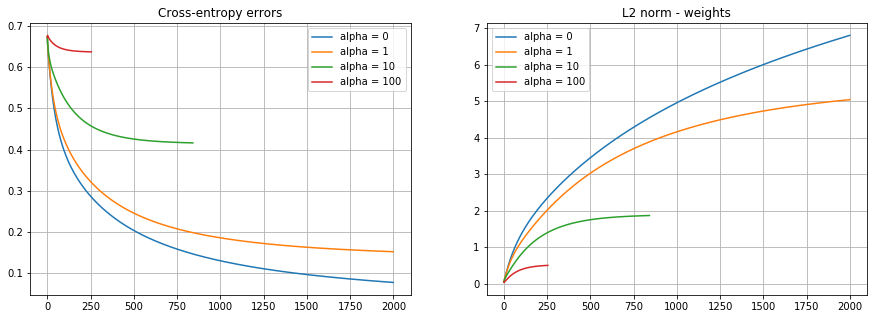

In [38]:
alpha_list = [0, 1, 10, 100]

figure, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title("Cross-entropy errors")
ax[1].set_title("L2 norm - weights")
for alpha_ in alpha_list:
    lr_w, w_trace = lr_train(seven_X, seven_y, alpha=alpha_, trace=True, epsilon=0.00001)
    
    xe_error = []
    w_norm = []
    for w_ in w_trace:
        xe_error.append(cross_entropy_error(seven_X, seven_y, w_))
        w_norm.append(norm(w_))
    
    ax[0].plot(range(len(w_trace)), xe_error, label="alpha = {0}".format(alpha_))
    ax[1].plot(range(len(w_trace)), w_norm, label="alpha = {0}".format(alpha_))
    
ax[0].legend(loc="best")
ax[0].grid()

ax[1].legend(loc="best")
ax[1].grid()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [60]:
from sklearn.preprocessing import PolynomialFeatures

data_X, data_y = make_classification(n_samples=100, n_features=2, 
                                     n_clusters_per_class=2, n_classes=2, n_informative=2, n_redundant=0)


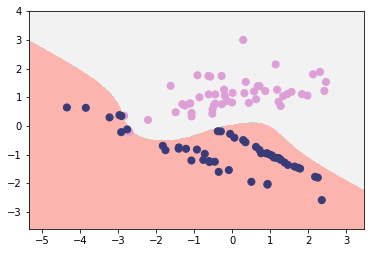

In [61]:
poly = PolynomialFeatures(5)
FI_3 = poly.fit_transform(data_X)

# C - inverse regularization factor 
log_reg = LogisticRegression(tol=0.00001, max_iter=1000, C=0.1)
log_reg.fit(FI_3, data_y)
log_reg_w = np.concatenate((log_reg.intercept_, log_reg.coef_[0]))

plot_2d_clf_problem(data_X, data_y, lambda x : log_reg.predict(poly.fit_transform(x)))

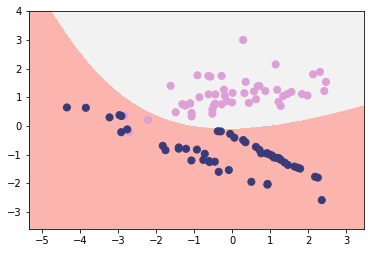

In [62]:
poly = PolynomialFeatures(2)
FI_2 = poly.fit_transform(data_X)

# C - inverse regularization factor 
log_reg = LogisticRegression(tol=0.00001, max_iter=1000, C=0.1)
log_reg.fit(FI_2, data_y)
log_reg_w = np.concatenate((log_reg.intercept_, log_reg.coef_[0]))

plot_2d_clf_problem(data_X, data_y, lambda x : log_reg.predict(poly.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?